In [1]:
import torch
from torch import nn
%pip install torchviz
from torchviz import make_dot

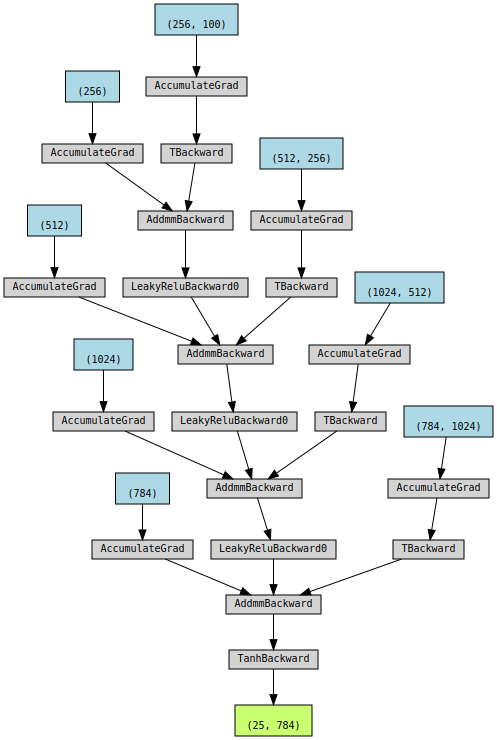

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        ###  TODO: Change the architecture and value as CW2 Guidance required
        self.fc1 = nn.Sequential(nn.Linear(100, 256), nn.LeakyReLU())
        self.fc2 = nn.Sequential(nn.Linear(256, 512), nn.LeakyReLU())
        self.fc3 = nn.Sequential(nn.Linear(512, 1024), nn.LeakyReLU())
        # output hidden layer
        self.fc4 = nn.Sequential(nn.Linear(1024, 784), nn.Tanh())

    def forward(self, x):
        ###  TODO: modify to be consistent with the network structure
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x
x1 = torch.randn(25, 100)
model = Generator()
output_g = model(x1)
make_dot(output_g, params=dict(Discriminator_Model.named_parameters()))

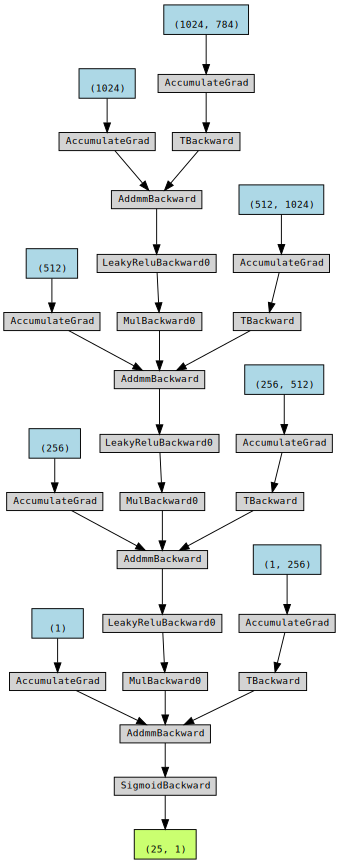

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        ###  TODO: Change the architecture and value as CW2 Guidance required
        self.fc1 = nn.Sequential(nn.Linear(784, 1024), nn.LeakyReLU(), nn.Dropout(0.3))
        self.fc2 = nn.Sequential(nn.Linear(1024, 512), nn.LeakyReLU(), nn.Dropout(0.3))
        self.fc3 = nn.Sequential(nn.Linear(512, 256), nn.LeakyReLU(), nn.Dropout(0.3))
        self.fc4 = nn.Sequential(nn.Linear(256, 1), nn.Sigmoid())

    def forward(self, x):
        ###  TODO: modify to be consistent with the network structure
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x
x1 = torch.randn(25, 784)
model = Discriminator()
output_d = model(x1)
make_dot(output_d, params=dict(Discriminator_Model.named_parameters()))

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        ###  TODO: Change the architecture and value as CW2 Guidance required
        self.fc1 = nn.Sequential(nn.Linear(100, 256), nn.LeakyReLU())
        self.fc2 = nn.Sequential(nn.Linear(256, 512), nn.LeakyReLU())
        self.fc3 = nn.Sequential(nn.Linear(512, 1024), nn.LeakyReLU())
        # output hidden layer
        self.fc4 = nn.Sequential(nn.Linear(1024, 784), nn.Tanh())

    def forward(self, x):
        ###  TODO: modify to be consistent with the network structure
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        ###  TODO: Change the architecture and value as CW2 Guidance required
        self.fc1 = nn.Sequential(nn.Linear(784, 1024), nn.LeakyReLU(), nn.Dropout(0.3))
        self.fc2 = nn.Sequential(nn.Linear(1024, 512), nn.LeakyReLU(), nn.Dropout(0.3))
        self.fc3 = nn.Sequential(nn.Linear(512, 256), nn.LeakyReLU(), nn.Dropout(0.3))
        self.fc4 = nn.Sequential(nn.Linear(256, 1), nn.Sigmoid())

    def forward(self, x):
        ###  TODO: modify to be consistent with the network structure
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

class MyEnsemble(nn.Module):
    def __init__(self, generator, discriminator):
        super(MyEnsemble, self).__init__()
        self.generator = generator
        self.discriminator = discriminator
        
    def forward(self, x1, x2):
        x1 = self.generator(x1)
        x2 = self.discriminator(x2)
        x = torch.cat((x1, x2), dim=1)
        return x

# Create models and load state_dicts    
generator = Generator()
giscriminator = Discriminator()

model = MyEnsemble(generator, giscriminator)
x1, x2 = torch.randn(25, 100), torch.randn(25, 784)
output = model(x1, x2)       


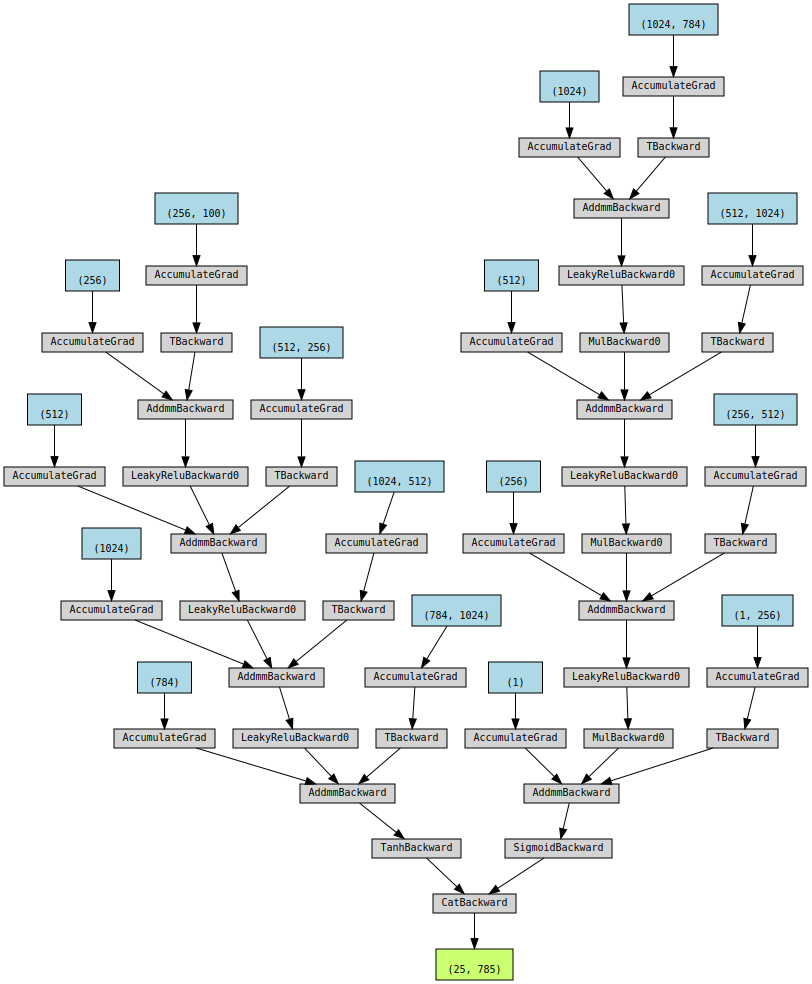

In [9]:
make_dot(output, params=dict(Discriminator_Model.named_parameters()))